<h1> <center> PYTHON </center> </h1>
<h2><center>2020.09.16</center>
<br>
<center>이 준 호 </center> </h2>

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font_family = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_family

## 1번

In [2]:
# xlsx라서 read_excel, 데이터가 커서 느림.
res = pd.read_excel('data/6270000_대구광역시_07_24_04_P_일반음식점.xlsx')
res.head()

,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,1,일반음식점,07_24_04_P,3410000,3410000-101-2002-00042,20020321,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,144.58,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3410000,3410000-101-2002-00043,20020322,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,59.55,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3410000,3410000-101-2002-00046,20020322,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,42.78,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3410000,3410000-101-2002-00067,20020325,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,77.01,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3410000,3410000-101-2002-00041,20020325,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,NaN,N,140.58,NaN,NaN,NaN


In [3]:
# res 데이터를 계속 쓸 수 있겠지만 데이터 자체가 너무 크고 쓸모없는 것들이 많으니 필요한 것들만 추출
res2 = res[['상세영업상태코드','소재지전체주소','업태구분명']]
# na가 있는 행 삭제
res2 = res2.dropna(axis=0)
# 상태코드는 1이면 영업 2이면 폐업이었습니다. 상태명으로 해도 괜찮습니다.
res2 = res2[res2['상세영업상태코드']==1]
# 카테고리가 2개라서 isin 사용
res2 = res2[res2['업태구분명'].isin(['호프/통닭','통닭(치킨)'])]
res2.head()

,상세영업상태코드,소재지전체주소,업태구분명
4589,1,대구광역시 중구 공평동 0058-0006번지,호프/통닭
4604,1,대구광역시 중구 남산동 2120-0001번지,호프/통닭
4627,1,대구광역시 중구 남산동 2380-0023번지,호프/통닭
4684,1,대구광역시 중구 삼덕동1가 0028-0007번지 지상3층,호프/통닭
4699,1,대구광역시 중구 남성로 0094-0001번지,호프/통닭


In [4]:
#동네는 동을 나타냅니다. 각 동이나 구의 이름의 길이는 다르더라도 모두 띄어쓰기는 통일되어있습니다. split를 이용해서 대구광역시 구 동네 list로 변경. 그 list의 3번째 즉 동네를 맵으로 추출 
def f(group):
    return group[2]
res2['동네'] = list(map(f,res2['소재지전체주소'].str.split(' ')))

In [5]:
#동일하게 구를 추출
def f2(group):
    return group[1]
res2['구'] = list(map(f2,res2['소재지전체주소'].str.split(' ')))

In [6]:
res2.head()

,상세영업상태코드,소재지전체주소,업태구분명,동네,구
4589,1,대구광역시 중구 공평동 0058-0006번지,호프/통닭,공평동,중구
4604,1,대구광역시 중구 남산동 2120-0001번지,호프/통닭,남산동,중구
4627,1,대구광역시 중구 남산동 2380-0023번지,호프/통닭,남산동,중구
4684,1,대구광역시 중구 삼덕동1가 0028-0007번지 지상3층,호프/통닭,삼덕동1가,중구
4699,1,대구광역시 중구 남성로 0094-0001번지,호프/통닭,남성로,중구


In [7]:
#동네가 기준이라 추출, 뒤에 오는 column은 사실 종류가 상관이 없습니다.
res3 = res2[['동네','구']]
#개수를 보여줄 거니까 column 이름 변경
res3.columns = ['동네','개수']
#동네로 묶기
res3 = res3.groupby('동네')
#동네별 index 수 count    index의 수가 결국 동네에 있는 통닭집의 수 
res3 = res3.count()
#sort 오름차순
res3.sort_values('개수',ascending=False)

,개수
동네,
대명동,149
다사읍,118
상인동,111
태전동,92
평리동,91
...,...
월암동,1
대림동,1
이현동,1


In [8]:
res3.sort_values('개수',ascending=False).iloc[0]

개수    149
Name: 대명동, dtype: int64

## 2번

In [9]:
#마찬가지로 구로 그룹
res4 = res2[['구','동네']]
res4.columns=['구','개수']
res4 = res4.groupby('구')
res4 = res4.count()
res4.sort_values('개수',ascending=False)

,개수
구,
달서구,841
북구,618
수성구,453
동구,422
달성군,394
서구,249
남구,207
중구,183


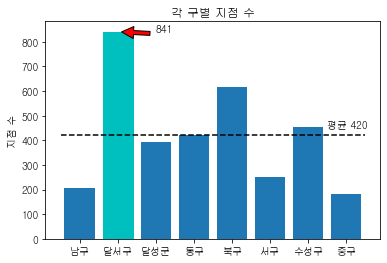

In [10]:
#복습
res4_list = res4.index.tolist() 
x_pos = np.arange(len(res4_list))
rank = res4.개수.tolist()
bar_list = plt.bar(x_pos, rank)
bar_list[res4_list.index("달서구")].set_color('c') 
plt.xticks(x_pos,res4_list)
plt.ylabel('지점 수')
plt.title('각 구별 지점 수')

plt.annotate(str(rank[1]), 
             xy=(res4_list.index("달서구"), rank[1]), 
             xytext=(res4_list.index("달서구") + 1, rank[1] + 0.01),
             arrowprops=dict(facecolor='r', shrink=0.1))
plt.plot([-0.5, 7.5], [res4['개수'].values.mean(), res4['개수'].values.mean()], "k--")
plt.annotate("평균 "+str(int(res4['개수'].values.mean())), xy=(7,res4['개수'].values.mean()),xytext=(6.5,res4['개수'].values.mean()+30))
plt.show()

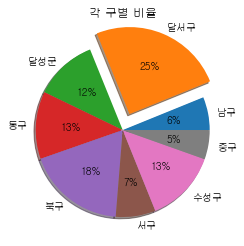

In [11]:
#복습
explode=(0,0.2,0,0,0,0,0,0)
labels = res4.index.tolist()
plt.pie(res4,explode=explode,labels=labels,shadow=True,autopct='%.0f%%')
plt.title('각 구별 비율')
plt.show()